In [4]:
#1 导入库

from numpy import loadtxt

from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

import numpy as np
#2 加载糖尿病人数据集

dataset = loadtxt('./dataset/pima-indians-diabetes.csv',delimiter=",")

dataset

array([[   6.   ,  148.   ,   72.   , ...,    0.627,   50.   ,    1.   ],
       [   1.   ,   85.   ,   66.   , ...,    0.351,   31.   ,    0.   ],
       [   8.   ,  183.   ,   64.   , ...,    0.672,   32.   ,    1.   ],
       ..., 
       [   5.   ,  121.   ,   72.   , ...,    0.245,   30.   ,    0.   ],
       [   1.   ,  126.   ,   60.   , ...,    0.349,   47.   ,    1.   ],
       [   1.   ,   93.   ,   70.   , ...,    0.315,   23.   ,    0.   ]])

In [5]:
np.shape(dataset)

(768, 9)

In [8]:
#3 分割数据为 X 和 y

X = dataset[:,0:8]

Y = dataset[:,8]

X_train,X_test, y_train, y_test = train_test_split(X,  
                                                   Y,  
                                                   test_size = 0.2,  
                                                   random_state = 0) 
#4 用训练数据进行模型拟合

model = XGBClassifier()

model.fit(X_train,y_train)

#5 用测试数据进行预测

y_pred = model.predict(X_test)

predictions = [round(value) for value in y_pred]

#6 评估预测精度

accuracy = accuracy_score(y_test,predictions)

print("精度等于: %.3f%%" %(accuracy*100.0))


精度等于: 81.818%


In [9]:
evals = [(X_test,y_test)]

model.fit(X_train,y_train,early_stopping_rounds=15,eval_metric="logloss",eval_set=evals, verbose=True)

[0]	validation_0-logloss:0.656425
Will train until validation_0-logloss hasn't improved in 15 rounds.
[1]	validation_0-logloss:0.627071
[2]	validation_0-logloss:0.601671
[3]	validation_0-logloss:0.58101
[4]	validation_0-logloss:0.563346
[5]	validation_0-logloss:0.549589
[6]	validation_0-logloss:0.536902
[7]	validation_0-logloss:0.524867
[8]	validation_0-logloss:0.513963
[9]	validation_0-logloss:0.506112
[10]	validation_0-logloss:0.499457
[11]	validation_0-logloss:0.490964
[12]	validation_0-logloss:0.484294
[13]	validation_0-logloss:0.47902
[14]	validation_0-logloss:0.474576
[15]	validation_0-logloss:0.471652
[16]	validation_0-logloss:0.466856
[17]	validation_0-logloss:0.464811
[18]	validation_0-logloss:0.462134
[19]	validation_0-logloss:0.461884
[20]	validation_0-logloss:0.459974
[21]	validation_0-logloss:0.455386
[22]	validation_0-logloss:0.454066
[23]	validation_0-logloss:0.452117
[24]	validation_0-logloss:0.449036
[25]	validation_0-logloss:0.448579
[26]	validation_0-logloss:0.445194

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

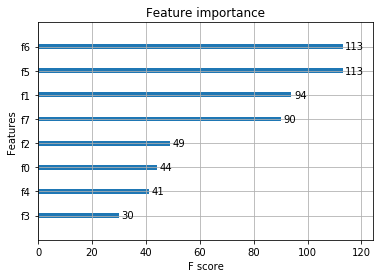

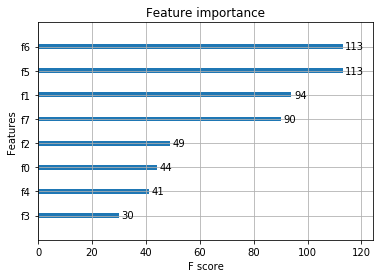

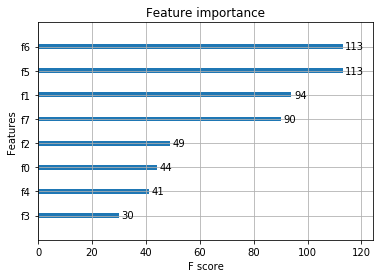

In [12]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

#绘制特征的重要性

plot_importance(model)

plt.show()